In [ ]:
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6


train:  (353, 10)
train:  (89, 10)
Score:  0.5602968611137958


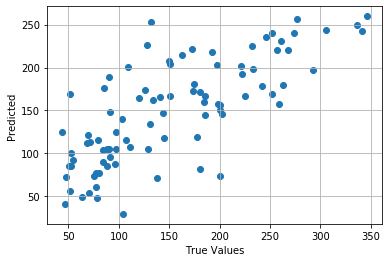

In [17]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Load the Diabetes dataset

# Declare the columns names
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split()

## Call the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()

df = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target

x_train,x_test, y_train,y_test = train_test_split(df,y,test_size=0.2)

print("train: ",x_train.shape)
print("train: ",x_test.shape)

# fit a model
lm = linear_model.LinearRegression()

model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

# The Scatter Plot
plt.scatter(y_test,predictions)
plt.grid()
plt.xlabel("True Values")
plt.ylabel("Predicted")

print("Score: ",model.score(x_test,y_test))

In [ ]:
# K-Folds Cross Validation
# In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. 
# We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

In [6]:
import numpy as np
from sklearn.model_selection import KFold
x = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1,2,3,4])
kf = KFold(n_splits=2)

# returns the number of splitting iterations in the cross-validator
kf.get_n_splits(x)

print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [10]:
# Leave One Out Cross Validation (LOOCV)
# In this type of cross validation, the number of folds (subsets) equals to the number of observations we have in the dataset. We then average ALL of these folds and build our model with the average. We then test the model against the last fold. 
# Because we would get a big number of training sets (equals to the number of samples), this method is very computationally expensive and should be used on small datasets. 

from sklearn.model_selection import LeaveOneOut
x = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])

loo = LeaveOneOut()
loo.get_n_splits(x)


2

In [18]:
# Examples:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets, linear_model
import pandas as pd
from numpy import mean

# Declare the columns names
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split()

# Call the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()

df = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target

# fit a model
model = linear_model.LinearRegression()

score = cross_val_score(model,df,y,cv=6 )
print("Score : ",score,"| Mean Score",mean(score) )

Score :  [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406] | Mean Score 0.4797803047530258


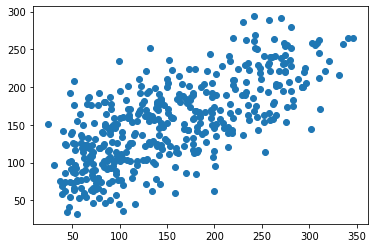

In [21]:
# Make cross validated predictions
from matplotlib import pyplot as plt

predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

In [22]:
# Accuracy of the Model:
# Check the R² score of the model (R² is a “number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s)”. Basically, how accurate is our model)

accuracy = metrics.r2_score(y, predictions)
print(accuracy)

0.4908065838640775
